<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_2/Figure_2a/create_ref_taxonomic_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to create the necessary for this [iTOL tree](https://itol.embl.de/tree/731141191163851728428307):

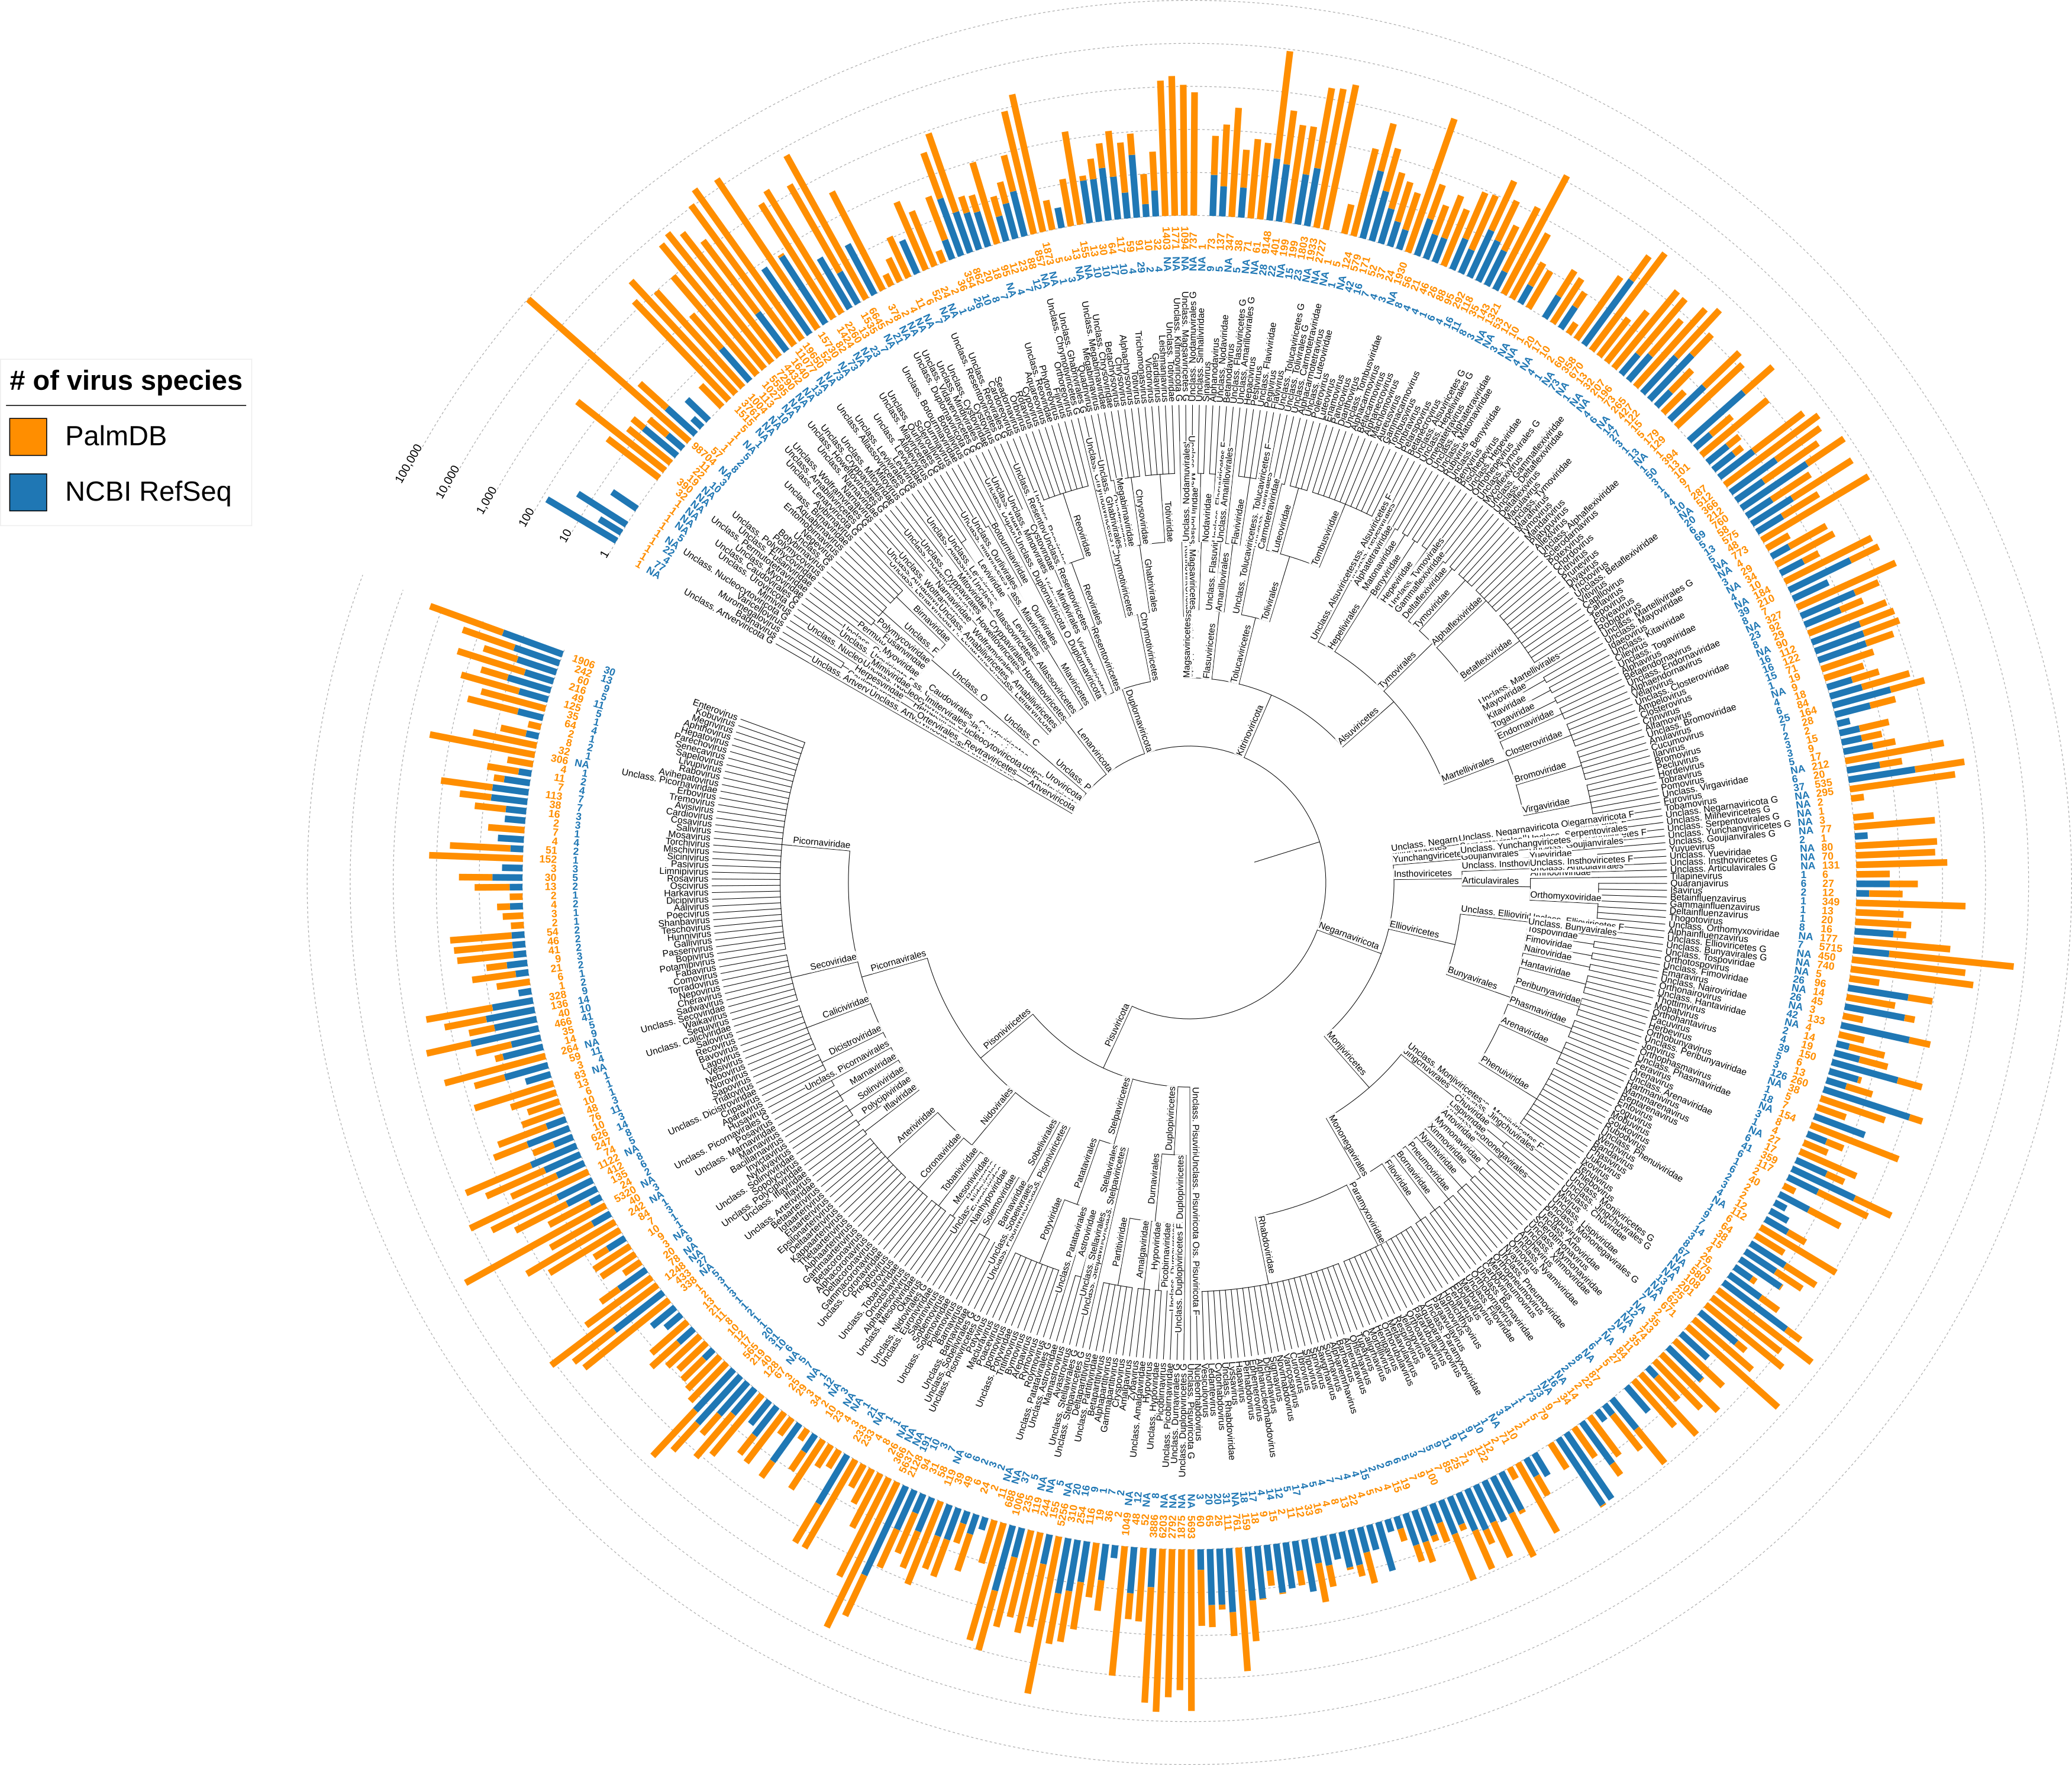

In [ ]:
import pandas as pd

Download virus ID to taxonomy mapping:

In [ ]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv

--2024-10-09 01:32:58--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19705497 (19M) [text/plain]
Saving to: ‘ID_to_taxonomy_mapping.csv’

ID_to_taxonomy_mapp 100%[===================>]  18.79M  83.0MB/s    in 0.2s    

2024-10-09 01:32:59 (83.0 MB/s) - ‘ID_to_taxonomy_mapping.csv’ saved [19705497/19705497]



In [ ]:
palmdb = pd.read_csv("ID_to_taxonomy_mapping.csv")
# Only keep columns of interest here
palmdb = palmdb[["ID", "phylum", "class", "order", "family", "genus", "species"]]
palmdb

ID        phylum            class        order         family  \
0            u1  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
1        u10066  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
2        u10121  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
3        u10124  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
4       u102609  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
...         ...           ...              ...          ...            ...   
296556  u296608             .                .            .              .   
296557  u296609             .                .            .              .   
296558  u296613             .                .            .              .   
296559  u296616             .                .            .              .   
296560  u296623             .                .            .              .   

                  genus                                            species  
0       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
1       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
2       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
3       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
4       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
...                 ...                                                ...  
296556                .                                                  .  
296557                .                                                  .  
296558                .                                                  .  
296559                .                                                  .  
296560                .                                                  .  

[296561 rows x 7 columns]

Add phylum "Unclassified" to all labels without classification and "Unclassified sp." labels with only species classified:

In [ ]:
# ## OLD Original code prior to journal reviews:
# # Only keep records with "." across all columns as "Unclassified" or those with only a species label as "Unclassified sp."
# for index, row in palmdb.iterrows():
#     if row["phylum"] == "." and row["class"] == "." and row["order"] == "." and row["family"] == "." and row["genus"] == ".":
#         if row["species"] == ".":
#             row["phylum"] = "Unclassified"
#         else:
#             row["phylum"] = "Unclassified sp."



## NEW Updated code based on Nature Biotechnology reviews:

# Replace "." with "[unknown_label] [last known taxonomic rank] [first letter of current rank]"
# label to retain all branches in the Newick tree

unknown_label = "Unclass."

def remove_rank_letter(old_string, letter_to_remove):
    pattern = f" {letter_to_remove}"

    # Only remove the pattern if it appears at the end of the string
    if old_string.endswith(pattern):
        return old_string[: -len(pattern)]
    # Return the string unchanged if the pattern is not at the end
    return old_string

def replace_unclassified(row, current_rank, higher_rank):
    return row[current_rank].replace(
        ".",
        f"{unknown_label} {row[higher_rank]}"
        if f"{unknown_label} " not in row[higher_rank]
        else f"{remove_rank_letter(row[higher_rank], higher_rank[0].capitalize())} {current_rank[0].capitalize()}",
    )

palmdb["phylum"] = palmdb["phylum"].str.replace(".", f"{unknown_label} P", regex=False)
palmdb["class"] = palmdb.apply(lambda row: replace_unclassified(row, "class", "phylum"), axis=1)
palmdb["order"] = palmdb.apply(lambda row: replace_unclassified(row, "order", "class"), axis=1)
palmdb["family"] = palmdb.apply(lambda row: replace_unclassified(row, "family", "order"), axis=1)
palmdb["genus"] = palmdb.apply(lambda row: replace_unclassified(row, "genus", "family"), axis=1)
palmdb["species"] = palmdb.apply(lambda row: replace_unclassified(row, "species", "genus"), axis=1)

palmdb

ID        phylum            class        order         family  \
0            u1  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
1        u10066  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
2        u10121  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
3        u10124  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
4       u102609  Pisuviricota  Pisoniviricetes  Nidovirales  Coronaviridae   
...         ...           ...              ...          ...            ...   
296556  u296608    Unclass. P       Unclass. C   Unclass. O     Unclass. F   
296557  u296609    Unclass. P       Unclass. C   Unclass. O     Unclass. F   
296558  u296613    Unclass. P       Unclass. C   Unclass. O     Unclass. F   
296559  u296616    Unclass. P       Unclass. C   Unclass. O     Unclass. F   
296560  u296623    Unclass. P       Unclass. C   Unclass. O     Unclass. F   

                  genus                                            species  
0       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
1       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
2       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
3       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
4       Betacoronavirus  Severe acute respiratory syndrome-related coro...  
...                 ...                                                ...  
296556       Unclass. G                                         Unclass. S  
296557       Unclass. G                                         Unclass. S  
296558       Unclass. G                                         Unclass. S  
296559       Unclass. G                                         Unclass. S  
296560       Unclass. G                                         Unclass. S  

[296561 rows x 7 columns]

In [ ]:
palmdb[["phylum", "class", "order", "family", "genus"]].drop_duplicates()

phylum                        class  \
0             Pisuviricota              Pisoniviricetes   
409        Negarnaviricota               Monjiviricetes   
475        Kitrinoviricota               Flasuviricetes   
590        Kitrinoviricota                Alsuviricetes   
909        Negarnaviricota               Monjiviricetes   
...                    ...                          ...   
277768        Pisuviricota              Pisoniviricetes   
280680        Pisuviricota              Pisoniviricetes   
282832     Kitrinoviricota               Magsaviricetes   
285582  Nucleocytoviricota  Unclass. Nucleocytoviricota   
292934        Pisuviricota              Pisoniviricetes   

                                order                         family  \
0                         Nidovirales                  Coronaviridae   
409                   Mononegavirales                    Filoviridae   
475                   Amarillovirales                   Flaviviridae   
590                     Hepelivirales                    Hepeviridae   
909                   Mononegavirales                Paramyxoviridae   
...                               ...                            ...   
277768                 Picornavirales                    Secoviridae   
280680                 Picornavirales                 Picornaviridae   
282832                  Nodamuvirales                 Sinhaliviridae   
285582  Unclass. Nucleocytoviricota O  Unclass. Nucleocytoviricota F   
292934                    Nidovirales                 Nanhypoviridae   

                                genus  
0                     Betacoronavirus  
409                        Ebolavirus  
475                        Flavivirus  
590                    Orthohepevirus  
909                     Morbillivirus  
...                               ...  
277768                     Sequivirus  
280680                  Potamipivirus  
282832        Unclass. Sinhaliviridae  
285582  Unclass. Nucleocytoviricota G  
292934                  Sajorinivirus  

[430 rows x 5 columns]

Make barplot showing number of viruses per phylum, class, order etc. and then overlay with how many of these can also be found in NCBI data.  

In [ ]:
def df_to_dict(df):
    """
    Convert data frame to node_to_children dictionary as a first step to converting it to Newick format.

    Every row in the data frame (df) should stand for one complete branch of the tree from the root to the leaves in order
    from left to right.

    Returns formatted dictionary.

    Source:
    https://stackoverflow.com/questions/65017040/how-to-convert-pandas-dataframe-to-dictionary-for-newick-format
    """
    node_to_children = {}

    # Setting arbritrary branch length 1
    branch_length = 1

    # Iterate over dataframe row-wise, assuming that every row stands for one complete branch of the tree
    for row in df.itertuples():
        # Remove index at position 0 and elements that contain no child (".")
        row_list = [element for element in row[1:] if element != "."]

        for i in range(len(row_list)-1):
            if row_list[i] in node_to_children.keys():
                # Check if parent entry already existing
                if row_list[i+1] in node_to_children[row_list[i]].keys():
                    # If already exists --> next
                    continue
                else:
                    # If entry does not exist --> update dict and add the connection
                    node_to_children[row_list[i]].update({row_list[i+1]:branch_length})
            else:
                # Add the branching point
                node_to_children[row_list[i]] = {row_list[i+1]:branch_length}

    return node_to_children


def newickify(node_to_children, root_node) -> str:
    """
    Function to convert a dictionary to Newick format.

    Source:
    https://stackoverflow.com/questions/50003007/how-to-convert-python-dictionary-to-newick-form-format
    """
    # Setting arbritrary branch length 1
    branch_length = 1

    visited_nodes = set()

    def newick_render_node(name, distance: float) -> str:
        assert name not in visited_nodes, "Error: The tree may not be circular!"

        if name not in node_to_children:
            # Leafs
            return F'{name}:{distance}'
        else:
            # Nodes
            visited_nodes.add(name)
            children = node_to_children[name]
            children_strings = [newick_render_node(child, children[child]) for child in children.keys()]
            children_strings = ",".join(children_strings)
            return F'({children_strings}){name}:{distance}'

    newick_string = newick_render_node(root_node, branch_length) + ';'

    # Ensure no entries in the dictionary were left unused
    assert visited_nodes == set(node_to_children.keys()), "Error: some nodes aren't in the tree"

    return newick_string

Remove virus ID and species columns to create a clean tree:

In [ ]:
# Remove non-relevent columns and change order of columns
phylogeny_data_clean = palmdb[["phylum", "class", "order", "family", "genus"]]

# Add "root" node
phylogeny_data_clean.insert(0, "root", "root")

## Convert data frame to node_to_children dictionary
node_to_children = df_to_dict(phylogeny_data_clean)

## Convert dictionary to Newick format
nw_string = newickify(node_to_children, root_node='root')

In [ ]:
with open("palmdb_newick.txt", "w") as file:
    file.write(nw_string)

Use palmdb_newick.txt to create the [iTOL](https://itol.embl.de/) tree. Download the tree nodes from iTOL (this was done using the [iTOL annotation editor](https://itoleditor.letunic.com/) in Google Sheets):

In [ ]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_2/Figure_2a/tree_endnodes.csv

--2024-10-09 01:33:39--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_2/Figure_2a/tree_endnodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15268 (15K) [text/plain]
Saving to: ‘tree_endnodes.csv’

tree_endnodes.csv   100%[===================>]  14.91K  --.-KB/s    in 0.001s  

2024-10-09 01:33:39 (10.8 MB/s) - ‘tree_endnodes.csv’ saved [15268/15268]



In [ ]:
gtn = pd.read_csv("tree_endnodes.csv", sep=",", header=0)

# Drop unnecessary columns
gtn = gtn[["Tree node ID", "Tree node label"]]

gtn

Tree node ID                Tree node label
0                        Mimivirus                      Mimivirus
1    Unclass. Nucleocytoviricota G  Unclass. Nucleocytoviricota G
2                  Muromegalovirus                Muromegalovirus
3                   Varicellovirus                 Varicellovirus
4                       Badnavirus                     Badnavirus
..                             ...                            ...
425                     Hunnivirus                     Hunnivirus
426                     Gallivirus                     Gallivirus
427                   Passerivirus                   Passerivirus
428                      Bopivirus                      Bopivirus
429                  Potamipivirus                  Potamipivirus

[430 rows x 2 columns]

Add species counts in PalmDB database:

In [ ]:
palmdb_sp_counts = []

for end_node in gtn["Tree node ID"].values:
    palmdb_sp_counts.append(len(palmdb[palmdb.isin([end_node]).any(axis=1)]))

gtn["palmdb_sp_count"] = palmdb_sp_counts
gtn

Tree node ID                Tree node label  \
0                        Mimivirus                      Mimivirus   
1    Unclass. Nucleocytoviricota G  Unclass. Nucleocytoviricota G   
2                  Muromegalovirus                Muromegalovirus   
3                   Varicellovirus                 Varicellovirus   
4                       Badnavirus                     Badnavirus   
..                             ...                            ...   
425                     Hunnivirus                     Hunnivirus   
426                     Gallivirus                     Gallivirus   
427                   Passerivirus                   Passerivirus   
428                      Bopivirus                      Bopivirus   
429                  Potamipivirus                  Potamipivirus   

     palmdb_sp_count  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
425               41  
426                9  
427               21  
428                6  
429                1  

[430 rows x 3 columns]

Species counts in NCBI/RefSeq (for the iTOL tree shown above and in the manuscript, the NCBI species counts were retrieved from http://www.virusite.org/index.php on 2024/10/08 (previous version: 2023/03/28)):

In [ ]:
import requests
import time
from tqdm import tqdm

In [ ]:
ncbi_sp_counts = []
for end_node in tqdm(gtn["Tree node ID"].values, desc="Processing nodes", unit="node"):
    # NEW: Set NCBI counts to "NA" for unclassified sOTUs
    if unknown_label in end_node:
        ncbi_sp_counts.append("NA")

    else:
        time.sleep(1)
        # Note rows was set to 15000 to overwrite maximum of 25 results
        r = requests.get(f"http://www.virusite.org/index.php?nav=browse&query1={end_node}&field1=virus.name&expand=false&search_nav=virus&sort=name&order=asc&rows=15000&page=1")

        # NEW: Handle virusite web scraping restrictions
        if "Permission denied" in r.text:
            sleep = 20
            print(f"Permission denied for node {end_node}. Trying again in {sleep}s.")
            time.sleep(sleep)
            r = requests.get(f"http://www.virusite.org/index.php?nav=browse&query1={end_node}&field1=virus.name&expand=false&search_nav=virus&sort=name&order=asc&rows=15000&page=1")

        if r.status_code != 200:
            print(f"Returned status code {r.status_code} for node {end_node}.")

        df_list = pd.read_html(r.content)
        df = df_list[-1]

        ncbi_sp_counts.append(len(df))

gtn["ncbi_sp_count"] = ncbi_sp_counts
gtn

Processing nodes:  11%|█         | 48/430 [00:43<04:43,  1.35node/s]

Permission denied for node Fijivirus. Trying again in 20s.


Processing nodes:  12%|█▏        | 53/430 [01:13<16:25,  2.61s/node]

Permission denied for node Rotavirus. Trying again in 20s.


Processing nodes:  14%|█▎        | 59/430 [01:46<18:09,  2.94s/node]

Permission denied for node Megabirnavirus. Trying again in 20s.


Processing nodes:  15%|█▍        | 64/430 [02:13<24:22,  4.00s/node]

Permission denied for node Betachrysovirus. Trying again in 20s.


Processing nodes:  15%|█▌        | 65/430 [02:36<49:52,  8.20s/node]

Permission denied for node Leishmaniavirus. Trying again in 20s.


Processing nodes:  18%|█▊        | 77/430 [03:12<12:27,  2.12s/node]

Permission denied for node Pestivirus. Trying again in 20s.


Processing nodes:  22%|██▏       | 96/430 [03:56<08:18,  1.49s/node]

Permission denied for node Pelarspovirus. Trying again in 20s.


Processing nodes:  23%|██▎       | 97/430 [04:18<32:04,  5.78s/node]

Permission denied for node Umbravirus. Trying again in 20s.


Processing nodes:  25%|██▌       | 108/430 [05:00<11:22,  2.12s/node]

Permission denied for node Benyvirus. Trying again in 20s.


Processing nodes:  31%|███       | 134/430 [05:53<08:27,  1.71s/node]

Permission denied for node Robigovirus. Trying again in 20s.


Processing nodes:  31%|███▏      | 135/430 [06:16<34:14,  6.96s/node]

Permission denied for node Foveavirus. Trying again in 20s.


Processing nodes:  33%|███▎      | 140/430 [06:47<22:08,  4.58s/node]

Permission denied for node Trichovirus. Trying again in 20s.


Processing nodes:  33%|███▎      | 142/430 [07:10<36:34,  7.62s/node]

Permission denied for node Divavirus. Trying again in 20s.


Processing nodes:  35%|███▍      | 149/430 [07:41<14:08,  3.02s/node]

Permission denied for node Cilevirus. Trying again in 20s.


Processing nodes:  35%|███▌      | 151/430 [08:04<27:10,  5.84s/node]

Permission denied for node Idaeovirus. Trying again in 20s.


Processing nodes:  37%|███▋      | 158/430 [08:35<16:59,  3.75s/node]

Permission denied for node Ampelovirus. Trying again in 20s.


Processing nodes:  45%|████▍     | 192/430 [09:45<07:13,  1.82s/node]

Permission denied for node Orthonairovirus. Trying again in 20s.


Processing nodes:  50%|████▉     | 214/430 [10:37<06:38,  1.84s/node]

Permission denied for node Hartmanivirus. Trying again in 20s.


Processing nodes:  53%|█████▎    | 230/430 [11:28<06:51,  2.06s/node]

Permission denied for node Mivirus. Trying again in 20s.


Processing nodes:  63%|██████▎   | 269/430 [12:45<05:21,  2.00s/node]

Permission denied for node Vesiculovirus. Trying again in 20s.


Processing nodes:  66%|██████▋   | 285/430 [13:38<05:32,  2.30s/node]

Permission denied for node Sprivivirus. Trying again in 20s.


Processing nodes:  67%|██████▋   | 286/430 [14:01<20:08,  8.39s/node]

Permission denied for node Sawgrhavirus. Trying again in 20s.


Processing nodes:  74%|███████▍  | 320/430 [15:14<03:12,  1.75s/node]

Permission denied for node Tritimovirus. Trying again in 20s.


Processing nodes:  80%|████████  | 344/430 [16:07<02:13,  1.55s/node]

Permission denied for node Alphacoronavirus. Trying again in 20s.


Processing nodes:  91%|█████████▏| 393/430 [17:52<01:07,  1.82s/node]

Permission denied for node Enterovirus. Trying again in 20s.


Processing nodes:  93%|█████████▎| 398/430 [18:23<01:53,  3.53s/node]

Permission denied for node Parechovirus. Trying again in 20s.


Processing nodes:  93%|█████████▎| 400/430 [18:48<03:31,  7.06s/node]

Permission denied for node Sapelovirus. Trying again in 20s.


Processing nodes:  95%|█████████▌| 410/430 [19:28<00:50,  2.52s/node]

Permission denied for node Salivirus. Trying again in 20s.


Processing nodes:  96%|█████████▋| 414/430 [19:57<01:08,  4.31s/node]

Permission denied for node Sicinivirus. Trying again in 20s.


Processing nodes:  99%|█████████▊| 424/430 [20:38<00:14,  2.47s/node]

Permission denied for node Teschovirus. Trying again in 20s.


Processing nodes: 100%|█████████▉| 429/430 [21:10<00:03,  3.66s/node]

Permission denied for node Potamipivirus. Trying again in 20s.


Processing nodes: 100%|██████████| 430/430 [21:32<00:00,  3.01s/node]


Tree node ID                Tree node label  \
0                        Mimivirus                      Mimivirus   
1    Unclass. Nucleocytoviricota G  Unclass. Nucleocytoviricota G   
2                  Muromegalovirus                Muromegalovirus   
3                   Varicellovirus                 Varicellovirus   
4                       Badnavirus                     Badnavirus   
..                             ...                            ...   
425                     Hunnivirus                     Hunnivirus   
426                     Gallivirus                     Gallivirus   
427                   Passerivirus                   Passerivirus   
428                      Bopivirus                      Bopivirus   
429                  Potamipivirus                  Potamipivirus   

     palmdb_sp_count ncbi_sp_count  
0                  1             5  
1                  1            NA  
2                  1             4  
3                  1            22  
4                  1            77  
..               ...           ...  
425               41             2  
426                9             3  
427               21             2  
428                6             1  
429                1             2  

[430 rows x 4 columns]

In [ ]:
# # OLD: Manually check the numbers of the "Unclassified" (0) and "Unclassified sp." (see below) endnotes for NCBI:
# # Number of Unclassified sp. for NCBI
# r = requests.get(f"http://www.virusite.org/index.php?nav=browse&query1=unclassified+viruses&field1=virus.name&expand=false&search_nav=virus&sort=name&order=asc&rows=15000&page=1")
# df_list = pd.read_html(r.content)
# df = df_list[-1]

# gtn.loc[gtn.index[gtn["Tree node ID"] == "Unclassified sp."][0], "ncbi_sp_count"] = len(df)

# # Manually change "Unclassified" to 0
# gtn.loc[gtn.index[gtn["Tree node ID"] == "Unclassified"][0], "ncbi_sp_count"] = 0

Log the counts since otherwise the NCBI counts are not visible in the plot since the PalmDB counts are much larger:

In [ ]:
import numpy as np
import numpy.ma as ma

In [ ]:
# Take log of values while masking 0s to keep them
gtn["palmdb_sp_count_log"] = ma.log(gtn["palmdb_sp_count"].values).filled(0)
gtn["ncbi_sp_count_log"] = ma.log(gtn["ncbi_sp_count"].replace("NA", 0).values).filled(0)

gtn

<ipython-input-16-b29937226964>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gtn["ncbi_sp_count_log"] = ma.log(gtn["ncbi_sp_count"].replace("NA", 0).values).filled(0)


Tree node ID                Tree node label  \
0                        Mimivirus                      Mimivirus   
1    Unclass. Nucleocytoviricota G  Unclass. Nucleocytoviricota G   
2                  Muromegalovirus                Muromegalovirus   
3                   Varicellovirus                 Varicellovirus   
4                       Badnavirus                     Badnavirus   
..                             ...                            ...   
425                     Hunnivirus                     Hunnivirus   
426                     Gallivirus                     Gallivirus   
427                   Passerivirus                   Passerivirus   
428                      Bopivirus                      Bopivirus   
429                  Potamipivirus                  Potamipivirus   

     palmdb_sp_count ncbi_sp_count  palmdb_sp_count_log  ncbi_sp_count_log  
0                  1             5             0.000000           1.609438  
1                  1            NA             0.000000           0.000000  
2                  1             4             0.000000           1.386294  
3                  1            22             0.000000           3.091042  
4                  1            77             0.000000           4.343805  
..               ...           ...                  ...                ...  
425               41             2             3.713572           0.693147  
426                9             3             2.197225           1.098612  
427               21             2             3.044522           0.693147  
428                6             1             1.791759           0.000000  
429                1             2             0.000000           0.693147  

[430 rows x 6 columns]

In [ ]:
# Substract the NCBI counts from the PalmDB since the bars will be on top of each other in the iTOL tree
# The PalmDB bar will be "behind" the NCBI bar (unfortunately, plotting two bars next to each other is not possible in iTOL)
gtn["palmdb_sp_count_log-ncbi_sp_count_log"] = gtn["palmdb_sp_count_log"] - gtn["ncbi_sp_count_log"]

# Replace all negative values in the "palmdb_sp_count_log-ncbi_sp_count_log" column with 0
gtn.loc[gtn['palmdb_sp_count_log-ncbi_sp_count_log'] < 0, 'palmdb_sp_count_log-ncbi_sp_count_log'] = 0

In [ ]:
gtn.to_csv("tree_endnodes_with_counts.csv")

On the iTOL website (using the "Datasets" tab):
1. Add the "ncbi_sp_count_log" and "palmdb_sp_count_log-ncbi_sp_count_log" to the iTOL tree as a multi value bar plot
2. Add the counts in the "palmdb_sp_count" column as text labels below the bar plot
3. Add the counts in the "ncbi_sp_count" column as text labels below the bar plot

___